In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import random

In [139]:
df = pd.read_csv("train.csv")
data = df.to_numpy().astype(np.float32)

In [140]:
np.random.seed(110)

In [141]:
np.random.shuffle(data)

In [142]:
X = data[:,1:]
Y = data[:,0]

In [143]:
len(Y)
splitPoint = round( len(Y)*0.7)
splitPoint

29400

In [144]:
train_y = Y[:splitPoint]
train_x = X[:splitPoint]
test_y = Y[splitPoint:]
test_x = X[splitPoint:]

In [128]:
print("The shapes of arrays are as following: ")
print(f"Train set shape of X is : {train_x.shape}")
print(f"Train set shape of Y is : {train_y.shape}")
print(f"Test set shape of X is : {test_x.shape}")
print(f"Test set shape of Y is : {test_y.shape}")

The shapes of arrays are as following: 
Train set shape of X is : (29400, 784)
Train set shape of Y is : (29400,)
Test set shape of X is : (12600, 784)
Test set shape of Y is : (12600,)


In [145]:
x = train_x[6].reshape(28,28)

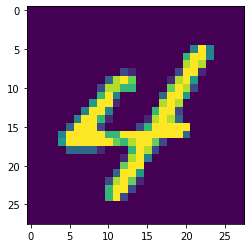

In [146]:
plt.imshow(x)

In [147]:
print("Normalization...")
train_x /= 255.0
test_x /= 255.0
print("Completed...")

Normalization...
Completed...


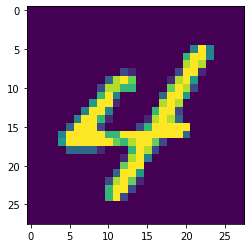

In [148]:
x = train_x[6].reshape(28,28)
plt.imshow(x)

# TRAINING

In [149]:
def indicatorMatrix(y):
    N = len(y)
    y = y.astype(np.int32)
    K = y.max() + 1
    ind = np.zeros((N,K))
    for n in range(N):
        k = y[n]
        ind[n,k] = 1
    return ind

In [150]:
def forwardPropagation(X,W,b):
    Z = X.dot(W) + b
    expZ = np.exp(Z)
    return expZ / expZ.sum(axis = 1, keepdims = True)

In [151]:
def cost(p_y, t):
    tot = t * np.log(p_y)
    return -tot.sum()

In [152]:
def error_rate(p_y, t):
    prediction = predict(p_y)
    return np.mean(prediction != t)

In [153]:
def predict(p_y):
    return np.argmax(p_y, axis = 1)

In [154]:
def gradW(t, y, X):
    return X.T.dot(t - y)
def gradb(t, y):
    return (t - y).sum(axis = 0)

In [155]:
print("The shapes of arrays are as following: ")
print(f"Train set shape of X is : {train_x.shape}")
print(f"Train set shape of Y is : {train_y.shape}")
print(f"Test set shape of X is : {test_x.shape}")
print(f"Test set shape of Y is : {test_y.shape}")

The shapes of arrays are as following: 
Train set shape of X is : (29400, 784)
Train set shape of Y is : (29400,)
Test set shape of X is : (12600, 784)
Test set shape of Y is : (12600,)


In [156]:
M, NX = train_x.shape
test_indicatorMatrix = indicatorMatrix(test_y)
train_indicatorMatrix = indicatorMatrix(train_y)
K = train_indicatorMatrix.shape[1]
print(f"Class number is {K}")
print(f"Train ind matrix is : {train_indicatorMatrix.shape}")
print(f"Test  ind matrix is : {test_indicatorMatrix.shape}")

Class number is 10
Train ind matrix is : (29400, 10)
Test  ind matrix is : (12600, 10)


In [157]:
print("Initialization of weight matrix and bias vector has started...\n")
W = np.random.randn(NX,K) / np.sqrt(NX)
print(f"Shape of W is {W.shape}")
print(f"An example of W is\n{W[0]}")
b = np.zeros(K)
print(f"Shape of b is {b.shape}")
print(f"Value of b is\n{b}")
print("\nInitialization of weight matrix and bias vector has COMPLETED")

Initialization of weight matrix and bias vector has started...

Shape of W is (784, 10)
An example of W is
[ 0.02839267 -0.07518903 -0.0121183  -0.03787641  0.01642355 -0.03786001
  0.01286712  0.02671923  0.00699233  0.04843336]
Shape of b is (10,)
Value of b is
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Initialization of weight matrix and bias vector has COMPLETED


In [158]:
train_losses = []
test_losses = []
train_error = []
test_error = []

Iteration : 10 Train Loss : 32188.091 Train Error : 0.287
                Test Loss  : 13860.064  Test Error  : 0.288
Iteration : 20 Train Loss : 16933.048 Train Error : 0.185
                Test Loss  : 7403.938  Test Error  : 0.189
Iteration : 30 Train Loss : 12916.174 Train Error : 0.121
                Test Loss  : 5721.773  Test Error  : 0.125
Iteration : 40 Train Loss : 12006.455 Train Error : 0.111
                Test Loss  : 5358.451  Test Error  : 0.116
Iteration : 50 Train Loss : 11449.403 Train Error : 0.106
                Test Loss  : 5137.213  Test Error  : 0.112
Iteration : 60 Train Loss : 11032.604 Train Error : 0.103
                Test Loss  : 4973.223  Test Error  : 0.109
Iteration : 70 Train Loss : 10704.558 Train Error : 0.101
                Test Loss  : 4845.500  Test Error  : 0.106
Iteration : 80 Train Loss : 10437.321 Train Error : 0.099
                Test Loss  : 4742.505  Test Error  : 0.104
Iteration : 90 Train Loss : 10213.915 Train Error : 0.097
     

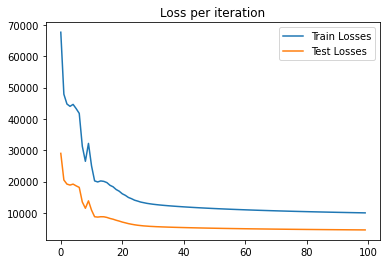

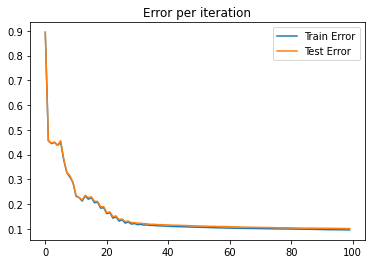

In [159]:
lr, reg, n_iter = 0.00003, 0.0, 100

for i in range(n_iter):
    p_y = forwardPropagation(train_x, W, b)
    trainLoss = cost(p_y, train_indicatorMatrix)
    train_losses.append(trainLoss)
    trainError = error_rate(p_y, train_y)
    train_error.append(trainError)
    
    p_y_test = forwardPropagation(test_x, W, b)
    testLoss = cost(p_y_test, test_indicatorMatrix)
    test_losses.append(testLoss)
    testError = error_rate(p_y_test, test_y)
    test_error.append(testError)
    
    W += lr*(gradW( train_indicatorMatrix, p_y, train_x ) - reg*W)
    b += lr*(gradb( train_indicatorMatrix, p_y ))
             
    if (i+1)%10 == 0:
        print(f"Iteration : {i+1} Train Loss : {trainLoss:.3f} Train Error : {trainError:.3f}")
        print(f"                Test Loss  : {testLoss:.3f}  Test Error  : {testError:.3f}")
        
p_y = forwardPropagation(test_x, W, b)
print(f"Final error rate is {error_rate(p_y, test_y)}")
             
plt.plot(train_losses, label = "Train Losses")
plt.plot(test_losses, label = "Test Losses")
plt.title("Loss per iteration")
plt.legend()
plt.show()
             
plt.plot(train_error, label = "Train Error")
plt.plot(test_error, label = "Test Error")
plt.title("Error per iteration")
plt.legend()
plt.show()